<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/Multiple_Linear_Regression_NLP_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [203]:
# Gholamrezadar 96405037 | October 2020

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## imports

In [204]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing, pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# change colab output quality
mpl.rcParams['figure.dpi'] = 120

## Loading Data

## A) Multiple Linear Regression


In [205]:
# read data as numpy array from text file
data = np.genfromtxt("/content/drive/My Drive/ex1data2.txt", delimiter=",")

# seperate x and y
x = data[:,0:2]
y = data[:,2]

# print(x)
# print()
# print(y)

### Plotting

Text(0.5, 0.98, 'House Prices')

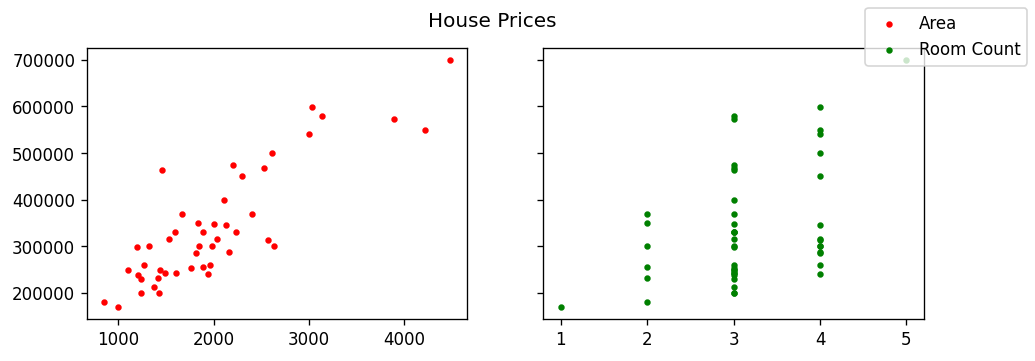

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(x[:,0], y,s=8, c="r",label="Area")
axs[1].scatter(x[:,1], y,s=8, c="g",label="Room Count")
fig.legend()
fig.suptitle('House Prices')

### Normalize the data

Text(0.5, 0.98, 'House Prices (Normalized)')

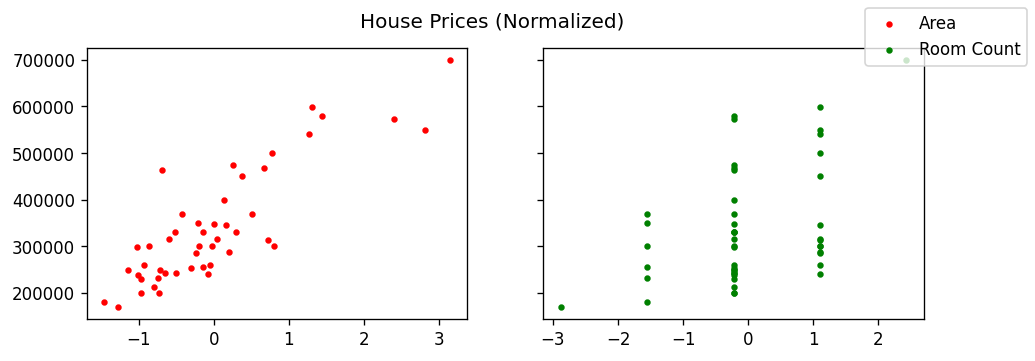

In [207]:
x_scaled = preprocessing.scale(x)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(x_scaled[:,0], y,s=8, c="r",label="Area")
axs[1].scatter(x_scaled[:,1], y,s=8, c="g",label="Room Count")
fig.legend()
fig.suptitle('House Prices (Normalized)')

### Linear Regression 


In [208]:
# fit a line to the data
reg = LinearRegression().fit(x_scaled.reshape(-1, 2), y)

# print regressions result
print("score = {}\n".format(reg.score(x_scaled.reshape(-1, 2), y)))
print("coeff = {},{}\n".format(reg.coef_[0],reg.coef_[1]))
print("intercept = {}\n".format(reg.intercept_))
print('Y = ', reg.coef_[0], 'X1 + ', reg.coef_[1], 'X2 + ', reg.intercept_)


score = 0.7329450180289143

coeff = 109447.7964696418,-6578.354854161245

intercept = 340412.6595744681

Y =  109447.7964696418 X1 +  -6578.354854161245 X2 +  340412.6595744681


# B) Adding Squares and Cubes of the data

### Polynomial Features

In [209]:
degree=3
reg=pipeline.make_pipeline(preprocessing.PolynomialFeatures(degree),LinearRegression())
reg.fit(x_scaled,y)

print("score = {}\n".format(reg.score(x_scaled.reshape(-1, 2), y)))


score = 0.7788762778666668



افزودن درجه دوم و سوم داده ها "اسکور" را افزایش داد
0.732 -> 0.778





# C) Regularization

### Lasso Regression

تاثیر ناچیزی داشت

In [210]:
# fit a line to the data
reg = Lasso(alpha=0.1).fit(x_scaled.reshape(-1, 2), y)

# print regressions result
print("score = {}\n".format(reg.score(x_scaled.reshape(-1, 2), y)))
print("coeff = {},{}\n".format(reg.coef_[0],reg.coef_[1]))
print("intercept = {}\n".format(reg.intercept_))
print('Y = ', reg.coef_[0], 'X1 + ', reg.coef_[1], 'X2 + ', reg.intercept_)

score = 0.7329450180258756

coeff = 109447.56588597743,-6578.12573487136

intercept = 340412.6595744681

Y =  109447.56588597743 X1 +  -6578.12573487136 X2 +  340412.6595744681


### Ridge Regression


تاثیر ناچیزی داشت

In [211]:
# fit a line to the data
reg = Ridge(alpha=1).fit(x_scaled.reshape(-1, 2), y)

# print regressions result
print("score = {}\n".format(reg.score(x_scaled.reshape(-1, 2), y)))
print("coeff = {},{}\n".format(reg.coef_[0],reg.coef_[1]))
print("intercept = {}\n".format(reg.intercept_))
print('Y = ', reg.coef_[0], 'X1 + ', reg.coef_[1], 'X2 + ', reg.intercept_)

score = 0.7324356141456507

coeff = 106080.0214222221,-4594.750624435499

intercept = 340412.6595744681

Y =  106080.0214222221 X1 +  -4594.750624435499 X2 +  340412.6595744681
